# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 2. Методы нахождения оценок

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /content/Cauchy.csv
100% 18.7k/18.7k [00:00<00:00, 43.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /content/Weibull.csv
100% 17.9k/17.9k [00:00<00:00, 36.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на от\-резке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле Cauchy.csv находятся координаты точек
пересечения лучей с поверхностью Земли.

In [ ]:
sample_1 = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


Функция максимального правдоподобия будет выглядеть как $f_{x_0} = \Pi_{i = 1}^ n p_i = \Pi_{i = 1}^ n \frac{1}{\pi(1 + (x_i-x_0)^2)}.$ \
Логарифм функции максимального правдоподобия: $Ln(x, \theta) = \ln(f_{x_0}) = \Sigma_{i=1}^n \frac{1}{\pi(1 + (x_i-x_0)^2)}.$



In [ ]:
def likelihood_function(sample, num, param):
  func_sample = np.zeros(param.shape[0])
  for i in range(param.shape[0]):
    func_sample[i] = (np.log(1 / (np.pi * (1 + (sample[:num] - param[i]) ** 2)))).sum()
  return func_sample

In [ ]:
dx = 0.01
interval = np.arange(-1000, 1000 + dx, dx)
measure = np.array([10, 100, sample_1.shape[0]])

for n in measure:
  ind = likelihood_function(sample_1, n, interval).argmax()
  print('Для ', n, ' измерений: ', interval[ind])


Для  10  измерений:  208.52999999890085
Для  100  измерений:  207.89999999890142
Для  1000  измерений:  207.97999999890135


Сравните полученные результаты с `sps.cauchy.fit`

In [ ]:
for n in measure:
  print('Для ', n, ' измерений: ', sps.cauchy.fit(sample_1[:n])[0])

Для  10  измерений:  208.50577017532487
Для  100  измерений:  207.87882548487846
Для  1000  измерений:  207.97772827944334


**Вывод:** оценки парамтера сдвига, посчитанные методом максимального правдоподобия, совпадают (точностью до 0.01) с оценками, полученными с помощью библиотечной функции sps.cauchy.fit, что может говорить о точности используемого метода.

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [ ]:
sample_2 = np.loadtxt("Weibull.csv")

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$
Подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. Постройте график (`plt.scatter`) выделив данные за первые четыре года красным цветом (`sample_2[:1461]`), остальные синим (`sample_2[1461:]`). Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Weibull plot')

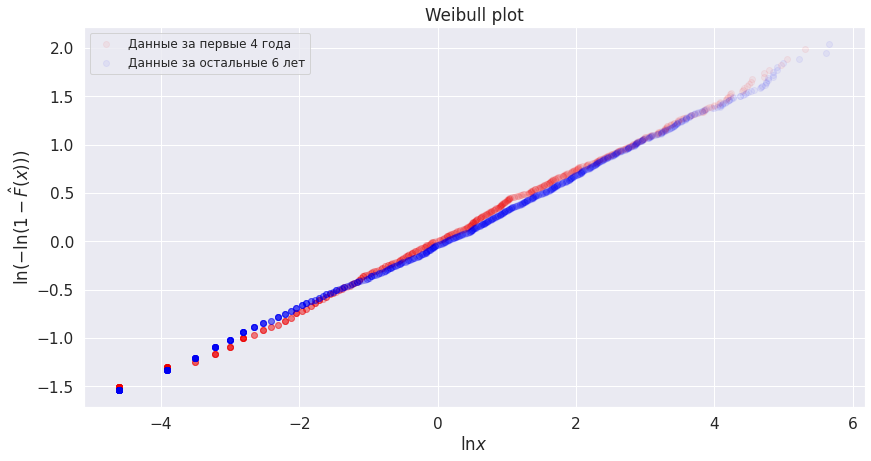

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

def y(sample, ecdf):
  return np.log(-np.log(1 - ecdf(sample)))

plt.figure(figsize=(14, 7))
ecdf = ECDF(sample_2[:1461])
plt.scatter(x=np.log(sample_2[:1461]), y=y(sample_2[:1461], ecdf), alpha=0.05, color='red', label='Данные за первые 4 года')
ecdf = ECDF(sample_2[1461:])
plt.scatter(x=np.log(sample_2[1461:]), y=y(sample_2[1461:], ecdf), alpha=0.05, color='blue', label='Данные за остальные 6 лет')
plt.legend(fontsize=12)
plt.xlabel(r'$\ln{x}$')
plt.ylabel(r'$\ln({-\ln({1-\hat{F}(x)}))}$')
plt.title('Weibull plot')

Сделайте вывод.

**Вывод:** Вид графика говорит о линейной зависимости между $y_i'$ и $x_i'$.\
$y_1' = \gamma_1x_1'$\
$y_2' = \gamma_2x_2'$\
Так как точки, соответсвующие данным из разных временных диапазонов, лежат на одной прямой, то коэффициент $\gamma_1 \approx \gamma_2$ . Значит, у обеих выборок коэффициент формы совпадает.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

Плотность распределения $p(x) = \gamma x^{\gamma - 1} e^{-x^{\gamma}}$.\
Функция максимального правдоподобия: $f_{\gamma}(x) = \Pi_{i = 1}^ n p_i = \gamma ^ n  e^{-\Sigma_{i = 1}^n x_i^\gamma}\Pi_{i = 1}^ n x_i^{\gamma - 1}$.\
Логарифм функции правдоподобия: $Ln(x, \gamma) = \ln(f_\gamma(x)) = n\ln{\gamma} - \Sigma_{i=1}^nx_i^{\gamma} + (\gamma - 1)\Sigma_{i=1}^n \ln{x_i}.$\
Найдём знаечние параметра $\gamma$, при котором  $Ln(x,\gamma)$ принимает своё максимальное занчение.

In [ ]:
def likelihood_function(sample, param):
  func_sample = np.zeros(param.shape[0])
  sample = sample[sample != 0]
  for i in range(param.shape[0]):
    gamma = 10 ** param[i]
    func_sample[i] = sample.shape[0] * np.log(gamma) - (sample ** gamma + (gamma - 1) * (np.log(sample))).sum()
  return func_sample


In [ ]:
dx = 10 ** -3
interval = np.arange(-2, 2 + dx, dx)
measure = np.array([1461, 3652])

estimations=[]
for n in measure:
  ind = likelihood_function(sample_2[:n], interval).argmax()
  estimations.append(10 ** interval[ind])
  print('Для ', n, ' измерений: ',  10 ** interval[ind])

Для  1461  измерений:  0.49773708497872177
Для  3652  измерений:  0.4808393484495235


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [ ]:
for n in measure:
  sample = sample_2[:n][sample_2[:n] != 0]
  print('Для ', n, ' измерений: ', sps.weibull_min.fit(sample, fscale=1, floc=0)[0])

Для  1461  измерений:  0.41806640624999947
Для  3652  измерений:  0.41025390624999947


Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$). Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Сравнение истинной выборки с данными при $\\gamma_1,\\, \\gamma_2$')

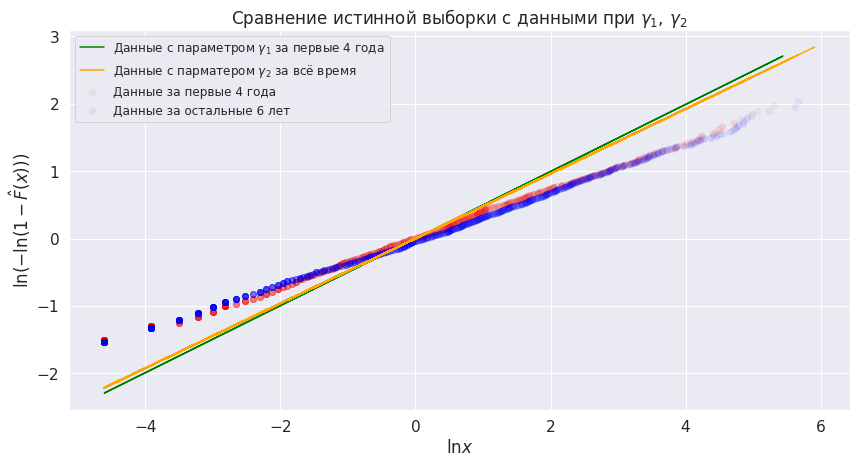

In [ ]:
def y(sample, ecdf):
  return np.log(-np.log(1 - ecdf(sample)))

plt.figure(figsize=(14, 7))
plt.plot(np.log(sample[:1461]), estimations[0] * np.log(sample[:1461]), color = 'green', label=r'Данные с параметром $\gamma_1$ за первые 4 года')

ecdf = ECDF(sample_2[:1461])
plt.scatter(x=np.log(sample_2[:1461]), y=y(sample_2[:1461], ecdf), alpha=0.05, color='red', label='Данные за первые 4 года')

ecdf = ECDF(sample_2)
plt.plot(np.log(sample_2), estimations[1] * np.log(sample_2), color='orange', label=r'Данные с парматером $\gamma_2$ за всё время')

ecdf = ECDF(sample_2[1461:])
plt.scatter(x=np.log(sample_2[1461:]), y=y(sample_2[1461:], ecdf), alpha=0.05, color='blue', label='Данные за остальные 6 лет')
plt.legend(fontsize=12)
plt.xlabel(r'$\ln{x}$')
plt.ylabel(r'$\ln({-\ln({1-\hat{F}(x)}))}$')
plt.title(r'Сравнение истинной выборки с данными при $\gamma_1,\, \gamma_2$')

**Вывод:** линии, соответсвующие посчитанным оценкам, не совпадают с линиями выборки.

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [ ]:
theta = 3
N = 1000

sample_norm = sps.norm(0, theta ** 0.5).rvs(size=N)
sample_uniform = sps.uniform(0, theta).rvs(size=N)
sample_gamma = sps.gamma(a=1, scale=theta).rvs(size=N)

Рассмотрим второй момент для нормального распределения:
$\mathbf{D}(X) = \theta.$\
Оценка: $\hat{\theta} = \mathbf{D}(X) = \overline{X^2} - \overline{X}^2.$

In [ ]:
def est_norm(sample, N):
  mean = (np.cumsum(sample) / np.arange(1, N + 1))
  double = (np.cumsum(sample ** 2) / np.arange(1, N + 1))
  return double - mean ** 2

theta_norm = est_norm(sample_norm, N)

Рассмотрим первый момент для равномерного распределения: 
$\mathbf{E}(X) = \frac{k + \theta}{2} = \frac{\theta}{2}.$\
Оценка $\hat{\theta} = 2\mathbf{E}(X).$

In [ ]:
def est_uniform(sample, N):
   return 2 * (np.cumsum(sample) / np.arange(1, N + 1))

theta_uniform = est_uniform(sample_uniform, N)

Рассмотрим первый момент для гамма-распределения: $\mathbf{E}(X) = \frac{\theta}{k} = \theta.$\
Оценка $\hat{\theta} = \mathbf{E}(X)$. 

In [ ]:
def est_gamma(sample, N):
  return np.cumsum(sample) / np.arange(1, N + 1)

theta_gamma = est_gamma(sample_gamma, N)

Text(0.5, 1.0, 'Зависимость ошибки оценки от реального значения от размера выборки')

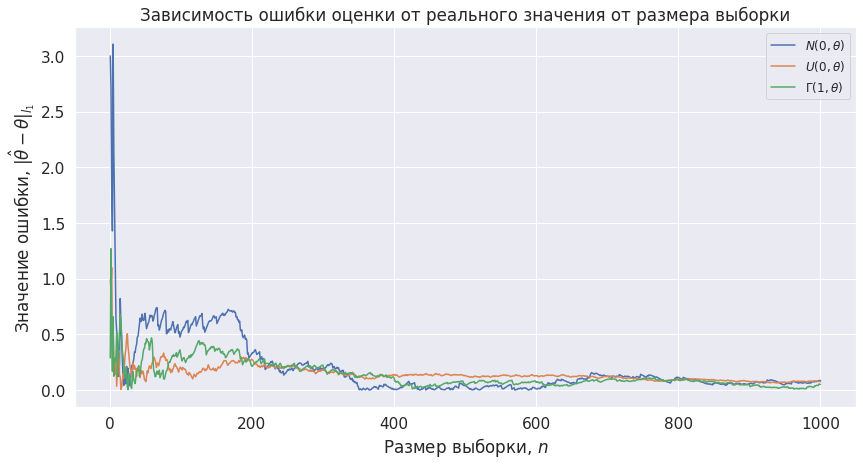

In [ ]:
x = np.arange(1, N + 1)

plt.figure(figsize=(14,7))
plt.plot(x, np.abs(theta_norm - theta), label=r'$N(0, \theta)$')
plt.plot(x, np.abs(theta_uniform - theta), label=r'$U(0, \theta)$')
plt.plot(x, np.abs(theta_gamma - theta), label=r'$\Gamma(1, \theta)$')
plt.legend(fontsize=12)
plt.xlabel(r'Размер выборки, $n$')
plt.ylabel(r'Значение ошибки, $|\hat{\theta} - \theta|_{l_1}$')
plt.title('Зависимость ошибки оценки от реального значения от размера выборки')

**Вывод:** оценки $\hat{\theta}$, полученные методом моментов, с увеличением размера выборки сходятся к истинному значению $\theta$.

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, не забудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [ ]:
K = [10] + [50] + list(range(100, 1001, 100))

def bootstrap_samples(K, sample):
    ind = np.random.randint(0, K, (K, K))
    K_samples = sample[ind]
    return K_samples

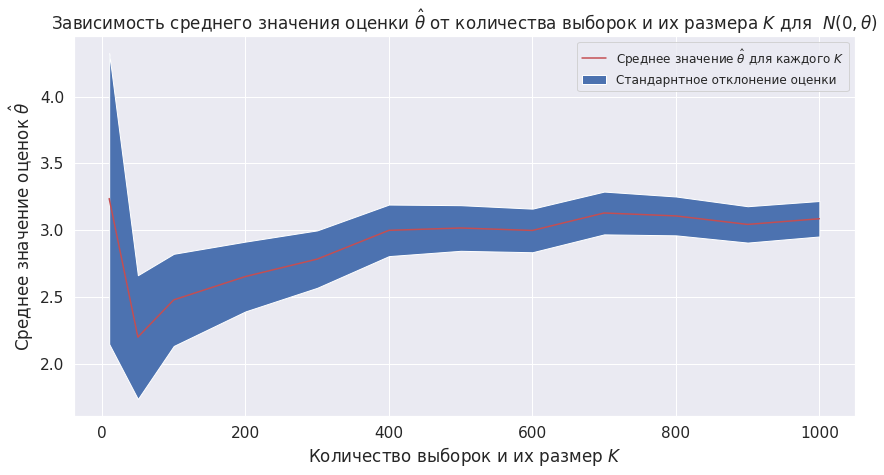

In [ ]:
boots_sample_norm = []
mean_norm = np.zeros(len(K))
var_norm = np.zeros(len(K))
std_norm = np.zeros(len(K))

for i in range(len(K)):
  sample = bootstrap_samples(K[i], sample_norm)
  mean_norm[i] = (sample.var(axis=1)).mean()
  var_norm[i] = (sample.var(axis=1) ** 2).mean() - mean_norm[i] ** 2
  boots_sample_norm.append(sample)

plt.figure(figsize=(14,7))
plt.plot(K, mean_norm, color='r', label = r'Среднее значение $\hat{\theta}$ для каждого $K$')
plt.fill_between(K, mean_norm + var_norm ** 0.5, mean_norm - var_norm ** 0.5, label = 'Стандарнтное отклонение оценки')
plt.ylabel(r'Среднее значение оценок $\hat{\theta}$')
plt.xlabel(r'Количество выборок и их размер $K$')
plt.title(r'Зависимость среднего значения оценки $\hat{\theta}$ от количества выборок и их размера $K$ для  $N(0, \theta)$')
plt.legend(fontsize=12)

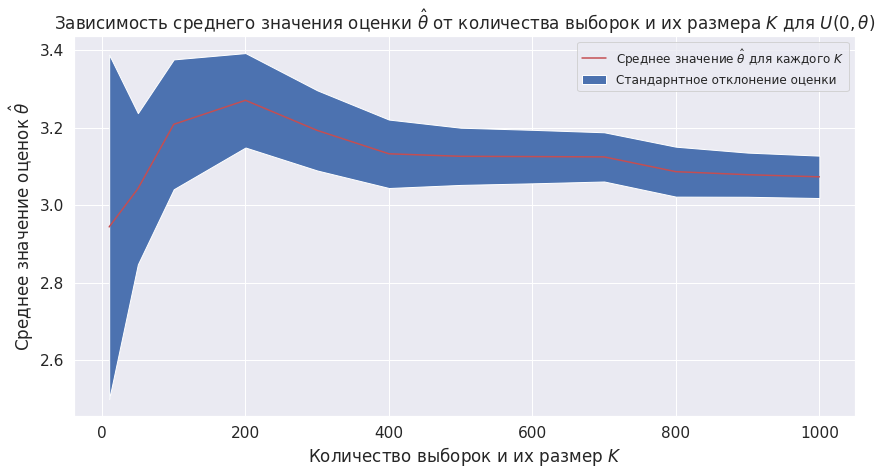

In [ ]:
boots_sample_uniform = []
mean_uniform = np.zeros(len(K))
var_uniform = np.zeros(len(K))

for i in range(len(K)):
  sample = bootstrap_samples(K[i], sample_uniform)
  mean_uniform[i] = (2 * sample.mean(axis=1)).mean()
  var_uniform[i] = ((2 * sample.mean(axis=1)) ** 2).mean() - mean_uniform[i] ** 2
  boots_sample_uniform.append(sample)

plt.figure(figsize=(14,7))
plt.plot(K, mean_uniform, color='r', label = r'Среднее значение $\hat{\theta}$ для каждого $K$')
plt.fill_between(K, mean_uniform + var_uniform ** 0.5, mean_uniform - var_uniform ** 0.5, label = 'Стандарнтное отклонение оценки')
plt.ylabel(r'Среднее значение оценок $\hat{\theta}$')
plt.xlabel(r'Количество выборок и их размер $K$')
plt.title(r'Зависимость среднего значения оценки $\hat{\theta}$ от количества выборок и их размера $K$ для $U(0, \theta)$')
plt.legend(fontsize=12)

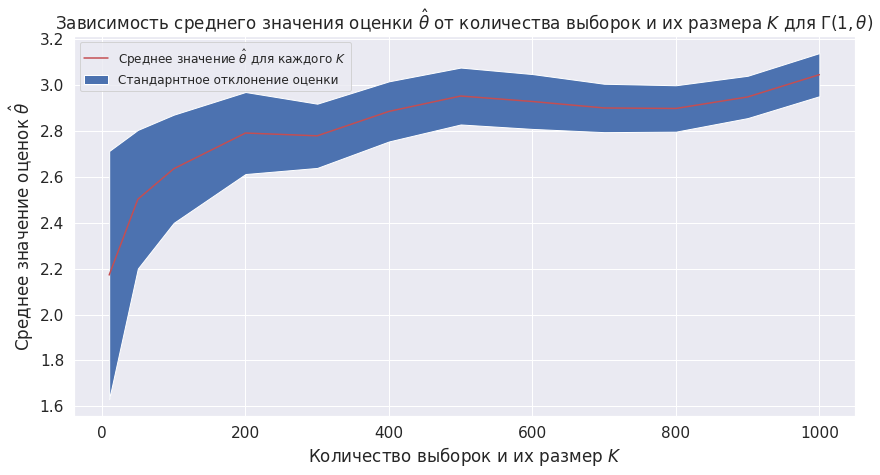

In [ ]:
boots_sample_gamma = []
mean_gamma = np.zeros(len(K))
var_gamma = np.zeros(len(K))

for i in range(len(K)):
  sample = bootstrap_samples(K[i], sample_gamma)
  mean_gamma[i] = (sample.mean(axis=1)).mean()
  var_gamma[i] = (sample.mean(axis=1) ** 2).mean() - mean_gamma[i] ** 2
  boots_sample_gamma.append(sample)

plt.figure(figsize=(14,7))
plt.plot(K, mean_gamma, color='r', label = r'Среднее значение $\hat{\theta}$ для каждого $K$')
plt.fill_between(K, mean_gamma + var_gamma ** 0.5, mean_gamma - var_gamma ** 0.5, label = 'Стандарнтное отклонение оценки')
plt.ylabel(r'Среднее значение оценок $\hat{\theta}$')
plt.xlabel(r'Количество выборок и их размер $K$')
plt.title(r'Зависимость среднего значения оценки $\hat{\theta}$ от количества выборок и их размера $K$ для $\Gamma(1, \theta)$')
plt.legend(fontsize=12)

**Вывод:** с увеличиением $K$, среднее значение оценок $\hat{\theta}$, сходится к истинному значению $\theta = 3$. \
Среднее значение оценки "колеблется" около истинного:\
-для нормального распределения, начиная с $K \approx 400$,\
-для равномерного распределения, начиная с $K \approx 100$,\
-для гамма-распределения, начиная с $K \approx 50$.